In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

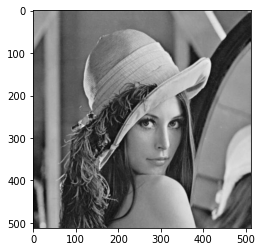

In [83]:
jpg_img = cv2.imread("C:\\Work\\Image_processing\\lena.jpg",cv2.IMREAD_COLOR)
gray_img = cv2.cvtColor(jpg_img,cv2.COLOR_RGB2GRAY)
height, width = gray_img.shape
plt.imshow(gray_img,cmap='gray')
plt.show()

In [72]:
from scipy.fftpack import dct, idct

# implement 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

# implement 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')

In [126]:
QP =[1,16,32,64,128]
#for i in range(len(QP)):
#    encoded_img = jpg_encoder(img,QP[i])
#    decoded_img = jpg_encoder(encoded_img,QP[i])
#    imwrite(decoded_img, 'encoded_data_QP[i].jpg')

# Zigzag scan of a matrix
# Argument is a two-dimensional matrix of any size,
# not strictly a square one.
# Function returns a 1-by-(m*n) array,
# where m and n are sizes of an input matrix,
# consisting of its items scanned by a zigzag method.
#
# Matlab Code:
# Alexey S. Sokolov a.k.a. nICKEL, Moscow, Russia
# June 2007
# alex.nickel@gmail.com

import numpy as np

def zigzag(input):
    #initializing the variables
    #----------------------------------
    h = 0
    v = 0
    vmin = 0
    hmin = 0
    vmax = input.shape[0]
    hmax = input.shape[1]
    #print(vmax ,hmax )
    i = 0
    output = np.zeros(( vmax * hmax))
    #----------------------------------
    while ((v < vmax) and (h < hmax)):
        if ((h + v) % 2) == 0:                 # going up
            if (v == vmin):
                #print(1)
                output[i] = input[v, h]        # if we got to the first line
                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        
                i = i + 1
            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
                #print(2)
                output[i] = input[v, h] 
                v = v + 1
                i = i + 1
            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
                #print(3)
                output[i] = input[v, h] 
                v = v - 1
                h = h + 1
                i = i + 1
        else:                                    # going down
            if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
                #print(4)
                output[i] = input[v, h] 
                h = h + 1
                i = i + 1
            elif (h == hmin):                  # if we got to the first column
                #print(5)
                output[i] = input[v, h] 
                if (v == vmax -1):
                    h = h + 1
                else:
                    v = v + 1
                i = i + 1
            elif ((v < vmax -1) and (h > hmin)):     # all other cases
                #print(6)
                output[i] = input[v, h] 
                v = v + 1
                h = h - 1
                i = i + 1
        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
            #print(7)
            output[i] = input[v, h] 
            break
    #print ('v:',v,', h:',h,', i:',i)
    Y = np.zeros((vmax,hmax))
    #print(Y.shape)
    #print(output.shape)
    for i in range(vmax):
        for j in range(hmax):
            Y[i][j] += output[vmax * i + j]
    return Y




# Inverse zigzag scan of a matrix
# Arguments are: a 1-by-m*n array, 
# where m & n are vertical & horizontal sizes of an output matrix.
# Function returns a two-dimensional matrix of defined sizes,
# consisting of input array items gathered by a zigzag method.
#
# Matlab Code:
# Alexey S. Sokolov a.k.a. nICKEL, Moscow, Russia
# June 2007
# alex.nickel@gmail.com


def inverse_zigzag(blk, vmax, hmax):
    #print input.shape
    # initializing the variables
    #----------------------------------
    h = 0
    v = 0
    vmin = 0
    hmin = 0
    output = np.zeros((vmax, hmax))
    i = 0
    #----------------------------------
    #for i in range(int(vmax)):
    #    for j in range(int(hmax)):
    #        inp[vmax * i + j] += blk[i][j]
    inp = blk.reshape(-1)
    
    while ((v < vmax) and (h < hmax)): 
        #print ('v:',v,', h:',h,', i:',i)
        if ((h + v) % 2) == 0:                 # going up
            if (v == vmin):
                #print(1)
                output[v, h] = inp[i]        # if we got to the first line
                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        
                i = i + 1
            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
                #print(2)
                output[v, h] = inp[i] 
                v = v + 1
                i = i + 1
            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
                #print(3)
                output[v, h] = inp[i] 
                v = v - 1
                h = h + 1
                i = i + 1
        else:                                    # going down
            if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
                #print(4)
                output[v, h] = inp[i] 
                h = h + 1
                i = i + 1
            elif (h == hmin):                  # if we got to the first column
                #print(5)
                output[v, h] = inp[i] 
                if (v == vmax -1):
                    h = h + 1
                else:
                    v = v + 1
                i = i + 1
            elif((v < vmax -1) and (h > hmin)):     # all other cases
                output[v, h] = inp[i] 
                v = v + 1
                h = h - 1
                i = i + 1
        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
            #print(7)
            output[v, h] = inp[i] 
            break
    return output
    
def jpg_encoder(origin,QP):
    blk_size = 8
    origin = origin.astype(np.double)
    M,N = origin.shape
    H = int(M / blk_size)
    W = int(N / blk_size)
    blk = np.zeros((blk_size,blk_size))
    encoded = np.zeros((M,N))
    
    for i in range(H):
        for j in range(W):
            blk = origin[i:i+blk_size,j:j+blk_size]
            dct_blk= cv2.dct(blk)
            quantized_blk = np.round((dct_blk)/QP)
            encoded[i * blk_size:(i+1)*blk_size,j * blk_size :(j+1)*blk_size] = quantized_blk[:,:]
            
    return encoded

def jpg_decoder(encoded,QP):
    blk_size = 8
    encoded = encoded.astype(np.double)
    M,N = encoded.shape
    H = int(M/ blk_size)
    W = int(N/ blk_size)
    
    blk = np.zeros((blk_size,blk_size))
    decoded = np.zeros((M,N))
    
    for i in range(H):
        for j in range(W):
            blk[:,:] = encoded[i * blk_size:(i+1)*blk_size,j * blk_size :(j+1)*blk_size]
            izigzag_blk = inverse_zigzag(blk, blk_size,blk_size)
            iquantize_blk = (izigzag_blk * QP)
            idct_blk = cv2.idct(iquantize_blk)
            decoded[i * blk_size:(i+1)*blk_size,j * blk_size :(j+1)*blk_size] = idct_blk[:,:]
    decoded = decoded.astype(np.uint8)
            
    return decoded

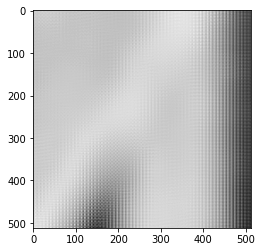

     0    1    2    3    4    5    6    7    8    9    ...  502  503  504  \
0    154  156  156  153  153  156  155  153  155  157  ...   89   84  106   
1    152  155  156  154  154  157  157  154  153  156  ...   89   86  102   
2    151  153  154  154  155  157  158  158  153  154  ...   88   89  103   
3    150  152  153  154  156  158  160  160  152  153  ...   87   91   95   
4    151  151  152  155  157  158  159  161  153  152  ...   85   85   93   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
507  165  164  167  167  167  167  169  169  167  165  ...   71   66   93   
508  163  162  163  164  165  164  165  169  166  164  ...   66   65   82   
509  165  164  161  163  166  164  164  169  170  166  ...   67   69   84   
510  165  165  164  169  170  169  169  172  170  169  ...   65   63   79   
511  169  169  168  175  174  172  174  177  175  174  ...   66   68   78   

     505  506  507  508  509  510  511  
0    105   98   94   94   94   90 

In [131]:
t_enc = jpg_encoder(gray_img,QP[0])

test = jpg_decoder(t_enc,QP[0])

plt.imshow(test,cmap='gray')
plt.show()
print(pd.DataFrame(test))

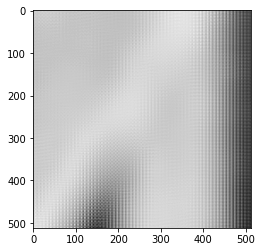

     0    1    2    3    4    5    6    7    8    9    ...  502  503  504  \
0    154  156  156  153  153  156  155  153  155  157  ...   89   84  106   
1    152  155  156  154  154  157  157  154  153  156  ...   89   86  102   
2    151  153  154  154  155  157  158  158  153  154  ...   88   89  103   
3    150  152  153  154  156  158  160  160  152  153  ...   87   91   95   
4    151  151  152  155  157  158  159  161  153  152  ...   85   85   93   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
507  165  164  167  167  167  167  169  169  167  165  ...   71   66   93   
508  163  162  163  164  165  164  165  169  166  164  ...   66   65   82   
509  165  164  161  163  166  164  164  169  170  166  ...   67   69   84   
510  165  165  164  169  170  169  169  172  170  169  ...   65   63   79   
511  169  169  168  175  174  172  174  177  175  174  ...   66   68   78   

     505  506  507  508  509  510  511  
0    105   98   94   94   94   90 

In [130]:
enc_img = jpg_encoder(gray_img,QP[0])
dec_img = np.zeros((512,512))
blk = np.zeros((8,8))
for i in range(64):
    for j in range(64):
        blk[:,:] = enc_img[i * 8:(i+1)*8,j * 8 :(j+1)*8]
        blk = blk.reshape(-1)
        izigzag_blk = inverse_zigzag(blk, 8, 8)
        iquantize_blk = izigzag_blk * QP[0]
        idct_blk = cv2.idct(iquantize_blk)
        dec_img[i * 8:(i+1)*8,j * 8 :(j+1)*8] = idct_blk[:,:]
        blk = np.zeros((8,8))
        #print(pd.DataFrame(blk))
        #dct_blk= cv2.dct(blk)
        #print(dct_blk)
        #blk = np.zeros((8,8))
#print(pd.DataFrame(dec_img))
dec_img = dec_img.astype(np.uint8)
plt.imshow(dec_img,cmap='gray')
plt.show()

print(pd.DataFrame(dec_img))





     0    1    2    3    4    5    6    7    8    9    ...  502  503  504  \
0    154  156  156  153  153  156  155  153  155  157  ...   89   84  106   
1    152  155  156  154  154  157  157  154  153  156  ...   89   86  102   
2    151  153  154  154  155  157  158  158  153  154  ...   88   89  103   
3    150  152  153  154  156  158  160  160  152  153  ...   87   91   95   
4    151  151  152  155  157  158  159  161  153  152  ...   85   85   93   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
507  165  164  167  167  167  167  169  169  167  165  ...   71   66   93   
508  163  162  163  164  165  164  165  169  166  164  ...   66   65   82   
509  165  164  161  163  166  164  164  169  170  166  ...   67   69   84   
510  165  165  164  169  170  169  169  172  170  169  ...   65   63   79   
511  169  169  168  175  174  172  174  177  175  174  ...   66   68   78   

     505  506  507  508  509  510  511  
0    105   98   94   94   94  

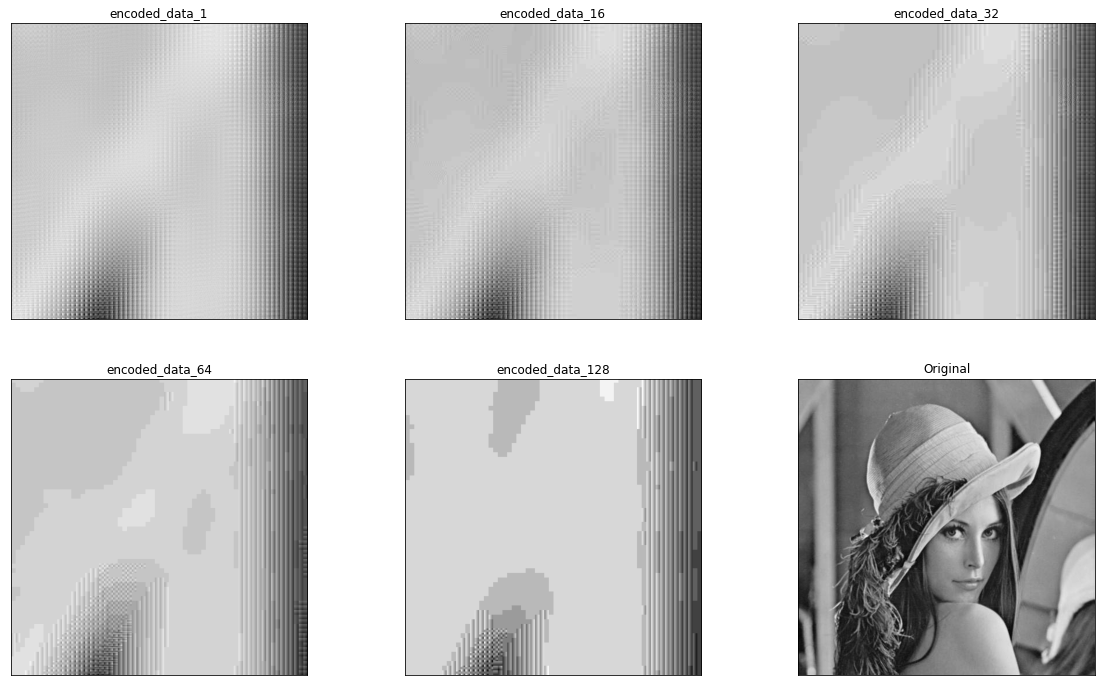

In [138]:
rows = 2
cols = 3
fig, axes = plt.subplots(rows,cols,figsize=(20,12)) 

#print(pd.DataFrame(gray_img))

for i in range(len(QP)):
    encoded_img = jpg_encoder(gray_img,QP[i])
    decoded_img = jpg_decoder(encoded_img,QP[i])
    print("\n")
    print("\n")
    print(pd.DataFrame(decoded_img))
    cv2.imwrite(f"C:\\Work\\Image_processing\\encoded_data_{QP[i]}.jpg",decoded_img)
    axes[int(i/3),i%3].imshow(decoded_img,cmap='gray')
    axes[int(i/3),i%3].set_title(f'encoded_data_{QP[i]}')
    axes[int(i/3),i%3].set_xticks([])
    axes[int(i/3),i%3].set_yticks([])
    
axes[1,2].imshow(gray_img,cmap='gray')
axes[1,2].set_title('Original')
axes[1,2].set_xticks([])
axes[1,2].set_yticks([])
plt.show()

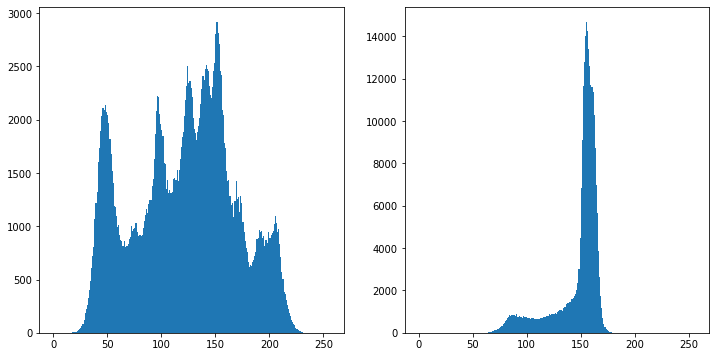

In [139]:
dst = np.clip(gray_img,0,255).astype(np.uint8)
dst2 = np.clip(test,0,255).astype(np.uint8)


fig = plt.figure(figsize=(12,6))
rows = 1
cols = 2
ax1 = fig.add_subplot(rows,cols,1)
ax1.hist(dst.ravel(),256,[0,256])

ax2 = fig.add_subplot(rows,cols,2)
ax2.hist(dst2.ravel(),256,[0,256])

plt.show()

In [132]:
cv2.imshow('image', dec_img)
cv2.waitKey(0)
cv2.destroyAllWindows()